In [4]:
# import random
# def createTestData2(count, skipNums):
#     xfile = open("testInput.txt", "w" )
#     yfile = open("testOutput.txt","w")
#     i=0;
#     while(i<count):
#         i+=1
#         a=skipNums[random.randrange(len(skipNums))]
#         b=skipNums[random.randrange(len(skipNums))]
#         c=a+b
#         xfile.write(str(a)+"\t"+str(b)+"\n")
#         yfile.write(str(c)+"\n")

#     xfile.close()
#     yfile.close()
            

In [5]:
import random
def createTestData(count):
    xfile = open("testInput.txt", "w" )
    yfile = open("testOutput.txt","w")

    for i in range(0,count):
        a = random.randint(0, 100)
        b = random.randint(0, 100)
        c = a+b
        xfile.write(str(a)+"\t"+str(b)+"\n")
        yfile.write(str(c)+"\n")

    xfile.close()
    yfile.close()



In [6]:
import random
def createTrainData(count, skipNums):
    xfile = open("trainInput.txt", "w" )
    yfile = open("trainOutput.txt","w")
    i = 0
    while(i<count):
        i+=1
        a=random.randint(0,100)
        b=random.randint(0,100)
        if(a in skipNums or b in skipNums):
            i-=1
            continue
        c=a+b
        xfile.write(str(a)+"\t"+str(b)+"\n")
        yfile.write(str(c)+"\n")

    xfile.close()
    yfile.close()
            

In [7]:
def readTrainData():
    xfile = open("trainInput.txt", "r" )
    yfile = open("trainOutput.txt","r")
    xdata = []
    ydata = []
    for line in xfile:
        xdata.append(list(map(int,line.split('\t'))))
    for line in yfile:
        ydata.append(int(line))
    xfile.close()
    yfile.close()
    return [xdata, ydata]

In [8]:
def readTestData():
    xfile = open("testInput.txt", "r" )
    yfile = open("testOutput.txt","r")
    xdata = []
    ydata = []
    for line in xfile:
        xdata.append(list(map(int,line.split('\t'))))
    for line in yfile:
        ydata.append(int(line))
    xfile.close()
    yfile.close()
    return [xdata, ydata]

In [9]:
createTrainData(500000, [10,14,20,50,6])

In [10]:
createTestData(50000)

In [11]:
#createTestData2(1000, [10,14,20,50,6])

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.models import load_model

import tensorflow as tf
import numpy as np
from keras_tqdm import TQDMNotebookCallback

Using TensorFlow backend.


In [13]:
testData = readTestData()
trainData = readTrainData()

#print(np.array(trainData[0]))

In [14]:
def massageInput(inputArr, length):
    vectors = np.zeros((len(inputArr), length), dtype=np.float_)
    for i in range(len(inputArr)):
        vectors[i] = np.zeros(length, dtype=np.float_)
        #vectors[i][0] = float(inputArr[i][0])/100.0
        #vectors[i][1] = float(inputArr[i][1])/100.0
        
        vectors[i] = np.asfarray(inputArr[i])/100
        #print(vectors[i])
        #vectors[i] /= 100
    
    return vectors

In [15]:
x_train = massageInput(trainData[0],2)
x_test = massageInput(testData[0],2)
#testData[0]
x_test

array([[ 0.03,  0.46],
       [ 0.76,  0.04],
       [ 0.92,  0.64],
       ..., 
       [ 0.85,  0.41],
       [ 0.3 ,  0.8 ],
       [ 0.19,  0.54]])

In [16]:
n_classes = 201 # MNIST classes for prediction(digits 0-9 )

In [17]:
y_train = keras.utils.to_categorical(trainData[1], n_classes)
y_test = keras.utils.to_categorical(testData[1], n_classes)
y_train[0]


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [69]:
# Training Parameters for basic MNIST

training_epochs = 200
batch_size = 1000

# Network Parameters
n_input = 2 #  data input (img shape: 101+101 flattened to be 202)
n_hidden_1 = 40 # 1st layer number of neurons
n_hidden_2 = 80 # 2nd layer number of neurons
n_hidden_3 = 160 # 2nd layer number of neurons
n_hidden_4 = 320 # 2nd layer number of neurons


In [70]:
Inp = Input(shape=(n_input,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)

x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
#x = Dropout(0.8)(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
#x = Dropout(0.8)(x)
x = Dense(n_hidden_4, activation='relu', name = "Dense_4")(x)
x = Dropout(0.8)(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)
# This creates a model that includes our input, 3 dense hidden layers, output layer
model = Model(Inp, output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
Dense_1 (Dense)              (None, 40)                120       
_________________________________________________________________
Dense_2 (Dense)              (None, 80)                3280      
_________________________________________________________________
Dense_3 (Dense)              (None, 160)               12960     
_________________________________________________________________
Dense_4 (Dense)              (None, 320)               51520     
_________________________________________________________________
dropout_7 (Dropout)          (None, 320)               0         
_________________________________________________________________
Outputlayer (Dense)          (None, 201)               64521     
Total para

In [71]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [72]:
learning_rate = .4
K.set_value(model.optimizer.lr, learning_rate)

In [73]:
def step_decay(epoch):
    drop_every = 10
    decay_rate = (learning_rate*(1- epoch/training_epochs))
    if(decay_rate < 0.04):
        decay_rate = 0.04
    return decay_rate
for i in range(0,200):
    print(step_decay(i))
# def scheduler(epoch):
#     if epoch >= 80 and epoch < 120:
#         K.set_value(model.optimizer.lr, .1)
#     elif epoch >=120 and epoch < 150:
#         K.set_value(model.optimizer.lr, .075)
#     else:
#         K.set_value(model.optimizer.lr, .05)
#     return K.get_value(model.optimizer.lr)
change_lr = LearningRateScheduler(step_decay)

0.4
0.398
0.396
0.394
0.392
0.39
0.388
0.386
0.384
0.382
0.38
0.378
0.376
0.37400000000000005
0.372
0.37000000000000005
0.36800000000000005
0.36600000000000005
0.36400000000000005
0.36200000000000004
0.36000000000000004
0.35800000000000004
0.35600000000000004
0.35400000000000004
0.35200000000000004
0.35000000000000003
0.34800000000000003
0.34600000000000003
0.34400000000000003
0.342
0.34
0.338
0.336
0.334
0.332
0.33
0.32800000000000007
0.326
0.32400000000000007
0.322
0.32000000000000006
0.31800000000000006
0.31600000000000006
0.31400000000000006
0.31200000000000006
0.31000000000000005
0.30800000000000005
0.30600000000000005
0.30400000000000005
0.30200000000000005
0.30000000000000004
0.298
0.296
0.294
0.292
0.29
0.288
0.28600000000000003
0.284
0.28200000000000003
0.27999999999999997
0.278
0.27599999999999997
0.274
0.27199999999999996
0.27
0.26799999999999996
0.266
0.26399999999999996
0.262
0.26
0.258
0.256
0.254
0.252
0.25
0.248
0.246
0.244
0.242
0.24
0.238
0.23600000000000004
0.2339999

In [74]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=0, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test),
                    callbacks=[change_lr,TQDMNotebookCallback(leave_inner=True,leave_outer=True)])


model.save('my_model1.h5')
del model
model = load_model('my_model1.h5')

In [75]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

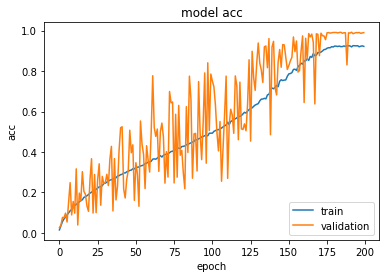

In [76]:
plot_train(history)

In [97]:
model.predict(np.array([[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]))

array([[  1.17956339e-22,   1.57205120e-19,   6.01677243e-21,
          4.70776372e-20,   2.49486300e-20,   2.53346629e-19,
          1.85806841e-19,   1.04675761e-17,   1.64334814e-17,
          1.69287691e-17,   5.37613301e-18,   2.08658274e-18,
          6.95218486e-20,   7.00159221e-17,   1.62500665e-19,
          7.47080146e-14,   2.29361302e-18,   4.17157010e-17,
          2.95618647e-20,   3.56511238e-17,   7.18941283e-21,
          2.32387398e-18,   1.24397786e-21,   1.84795877e-13,
          2.58936148e-21,   1.27084741e-14,   1.75502644e-21,
          5.19199896e-17,   2.04754101e-21,   2.45373936e-20,
          7.96450694e-23,   2.33042447e-19,   5.47790945e-23,
          2.27446329e-17,   4.26103079e-22,   7.58657553e-16,
          5.69229920e-24,   2.09957341e-18,   1.82494096e-26,
          1.04868133e-22,   1.42182317e-27,   3.37114975e-23,
          3.93609660e-27,   6.92674179e-21,   3.27787631e-25,
          1.45382799e-17,   6.85926871e-29,   9.69031687e-24,
        